In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('sales_data.csv')

In [22]:
data.describe()

,price,quantity,data
count,5.000000,5.000000,5
mean,2.660000,113.000000,2023-01-03 00:00:00
min,2.500000,100.000000,2023-01-01 00:00:00
25%,2.500000,105.000000,2023-01-02 00:00:00
50%,2.700000,110.000000,2023-01-03 00:00:00
75%,2.700000,120.000000,2023-01-04 00:00:00
max,2.900000,130.000000,2023-01-05 00:00:00
std,0.167332,12.041595,NaN


In [4]:
print(data.head())

         date   product  price  quantity
0  2023-01-01  Espresso    2.5       100
1  2023-01-02  Espresso    2.5       120
2  2023-01-03  Espresso    2.7       110
3  2023-01-04  Espresso    2.7       130
4  2023-01-05  Espresso    2.9       105


In [5]:
print(data.columns)

Index(['date', 'product', 'price', 'quantity'], dtype='object')


In [12]:
data.isnull

<bound method DataFrame.isnull of          date     product  price  quantity
0  2023-01-01    Espresso    2.5       100
1  2023-01-02    Espresso    2.5       120
2  2023-01-03    Espresso    2.7       110
3  2023-01-04    Espresso    2.7       130
4  2023-01-05    Espresso    2.9       105
5  2023-01-01  Cappuccino    3.0        80
6  2023-01-02  Cappuccino    3.0        90
7  2023-01-03  Cappuccino    3.2        85
8  2023-01-04  Cappuccino    3.2        95
9  2023-01-05  Cappuccino    3.4        88>

In [23]:
#data cleaning
data['data'] = pd.to_datetime(data['date'])
data['price'] = pd.to_numeric(data['price'])
data['quantity'] =  pd.to_numeric(data['quantity'])



In [19]:
#calculate price elasticity
from sklearn.linear_model import LinearRegression
grouped_data = data.groupby('product')

for product,data in grouped_data:
    X = data[['price']]
    y = data['quantity']

#fit the model
model = LinearRegression()
model.fit(X,y)

#calculate the price elasticity
price_elasticity = model.coef_[0]
print(f"Price Elasticity of Demand for {product} : {price_elasticity}")

Price Elasticity of Demand for Espresso : -3.5714285714285428


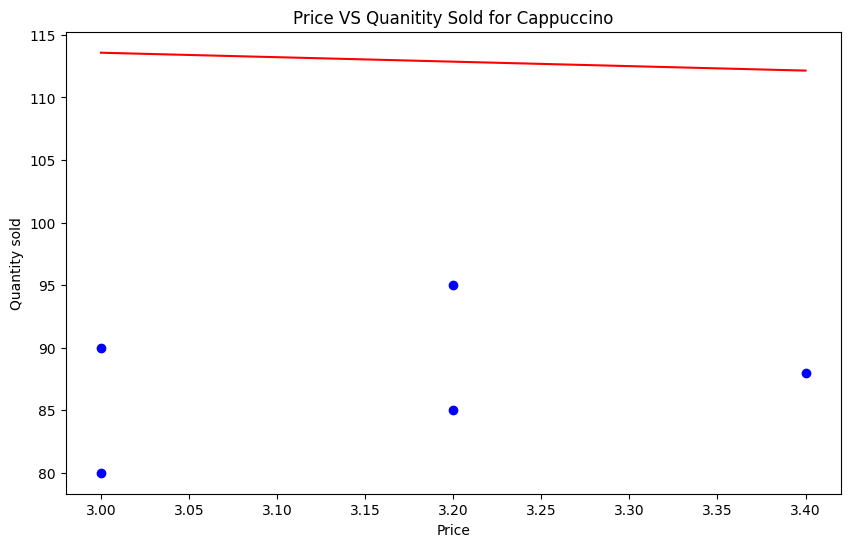

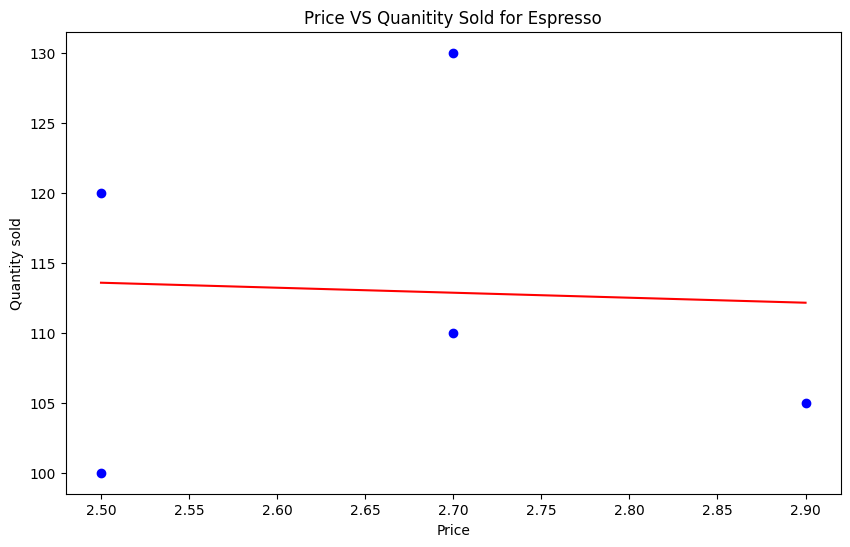

In [26]:
for product,data in grouped_data :
    plt.figure(figsize = (10,6))
    plt.scatter(data['price'],
               data['quantity'],color = 'blue')
    plt.plot(data['price'],model.predict(X),color = 'red')
    plt.title(f"Price VS Quanitity Sold for {product}")
    plt.xlabel('Price')
    plt.ylabel('Quantity sold')
    plt.show()
    

In [27]:
#Interpretation of Results

#   Negative Coefficient: A negative coefficient indicates that as price increases, quantity demanded decreases, which is typical for most goods.
#   Magnitude of Coefficient: The magnitude of the coefficient indicates the sensitivity of demand to price changes. A larger absolute value indicates more elastic demand.

#By understanding and calculating PED, the café can make informed decisions about pricing strategies to optimize revenue and profitability. 

#the regression line in the plot shows the trend :
# As price increases the quantity also decreases